## Format and Model Data with Decion Tree Classification

In [10]:
import pandas as pd
import numpy as np

In [11]:
# Load database
wdf_df = pd.read_csv('V4_WDF_OFFICIAL.csv')
wdf_df.head()

,Unnamed: 0,FIPS_ID,FIRE_NAME,FIRE_YEAR,DISCOVERY_TIME,STAT_CAUSE_DESCR,CONT_DATE,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,...,LONGITUDE,FIPS_NAME,DISCOVERY_MONTH,DISCOVERY_DAY,AWND,PRCP,TAVG,DURING_A_DROUGHT,WATERSHD,POP_BY_COUNTY
0,0,025-01,NORRISH,2000,945.0,Miscellaneous,5/31/2000,1800.0,87.4,C,...,-115.2919,Imperial,5,30,NaN,0.0,93.5,0.0,0,142359
1,1,025-02,GUN,2001,1245.0,Miscellaneous,5/20/2001,1345.0,0.1,A,...,-116.1486,Imperial,5,20,4.920,0.0,88.4,0.0,0,143295
2,2,025-03,ONEAL,2001,1600.0,Campfire,7/17/2001,2200.0,18.0,C,...,-116.0892,Imperial,7,17,10.405,0.0,91.0,0.0,0,143295
3,3,025-04,EXPEDITION,2002,1934.0,Lightning,12/28/2002,2000.0,0.1,A,...,-115.2050,Imperial,12,28,3.580,0.0,56.4,1.0,0,144818
4,4,025-05,M L K,2002,1345.0,Lightning,1/20/2002,1430.0,0.1,A,...,-115.1186,Imperial,1,20,6.040,0.0,52.6,0.0,0,144818


In [12]:
wdf_df.shape

(17245, 21)

**Step 1**: Add FIRE_SIZE_CLASS to 2016-Sep 2020 data based on FIRE_SIZE. Remove data points that don't have a FIRE_SIZE listed.

Definition of the following columns:
- FIRE_SIZE = Estimate of acres within the final perimeter of the fire.
- FIRE_SIZE_CLASS = Code for fire size based on the number of acres within the final fire perimeter expenditures (A=greater than 0 but less than or equal to 0.25 acres, B=0.26-9.9 acres, C=10.0-99.9 acres, D=100-299 acres, E=300 to 999 acres, F=1000 to 4999 acres, and G=5000+ acres).

In [13]:
# Remove for null values in FIRE_SIZE from the dataframe
wdf_df = wdf_df[wdf_df['FIRE_SIZE'].notnull()]
wdf_df.reset_index(inplace=True, drop=True)
wdf_df.shape

(17234, 21)

In [14]:
# Check columns that have null vales in FIRE_SIZE_CLASS
# This should be from FIRE_YEAR 2016-Sept 2020
wdf_df[wdf_df['FIRE_SIZE_CLASS'].isnull()]

,Unnamed: 0,FIPS_ID,FIRE_NAME,FIRE_YEAR,DISCOVERY_TIME,STAT_CAUSE_DESCR,CONT_DATE,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,...,LONGITUDE,FIPS_NAME,DISCOVERY_MONTH,DISCOVERY_DAY,AWND,PRCP,TAVG,DURING_A_DROUGHT,WATERSHD,POP_BY_COUNTY
91,91,025-174,Carter Fire,2020,NaN,NaN,4/4/2020,NaN,275.0,NaN,...,-115.586500,Imperial,4,4,12.750,0.0,70.666667,0.0,0,182333
576,584,029-1360,Cedar Fire,2016,NaN,NaN,NaN,NaN,29322.0,NaN,...,-118.567800,Kern,8,16,6.825,0.0,81.400000,1.0,0,880856
577,585,029-1361,Cotton Fire,2016,NaN,NaN,NaN,NaN,61.0,NaN,...,-120.251000,Kern,6,11,9.840,0.0,72.800000,1.0,1,880856
578,586,029-1362,Deer Fire,2016,NaN,NaN,NaN,NaN,1785.0,NaN,...,-118.722720,Kern,7,1,10.065,0.0,84.400000,1.0,1,880856
579,587,029-1363,Erskine Fire,2016,NaN,NaN,NaN,NaN,48019.0,NaN,...,-118.456280,Kern,6,23,7.605,0.0,81.400000,1.0,1,880856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17144,17221,111-148,South Fire,2019,NaN,NaN,NaN,NaN,131.0,NaN,...,-117.461363,Ventura,7,14,5.220,0.0,76.400000,0.0,1,846006
17145,17222,111-149,Wendy Fire,2019,NaN,NaN,NaN,NaN,91.0,NaN,...,-118.950833,Ventura,10,10,14.425,0.0,57.600000,0.0,0,846006
17147,17224,111-150,Elizabeth Fire,2020,NaN,NaN,NaN,NaN,289.0,NaN,...,-119.178080,Ventura,6,10,6.410,0.0,74.166667,0.0,1,851297
17148,17225,111-151,Holser Fire,2020,NaN,NaN,NaN,NaN,3000.0,NaN,...,-118.758965,Ventura,8,17,5.520,0.0,82.666667,0.0,0,851297


In [15]:
null_test = wdf_df['FIRE_SIZE_CLASS'].isnull()
null_test

0        False
1        False
2        False
3        False
4        False
         ...  
17229    False
17230    False
17231    False
17232    False
17233    False
Name: FIRE_SIZE_CLASS, Length: 17234, dtype: bool

In [16]:
# Apply FIRE_SIZE_CLASS to 2016-2020 rows
for i in range(len(wdf_df)):
    if null_test[i] == True:
        if wdf_df.FIRE_SIZE[i] > 0 and wdf_df.FIRE_SIZE[i] <= 0.25:
            wdf_df.FIRE_SIZE_CLASS[i] = 'A'
        if wdf_df.FIRE_SIZE[i] >= 0.26 and wdf_df.FIRE_SIZE[i] <= 9.9:
            wdf_df.FIRE_SIZE_CLASS[i] = 'B'
        if wdf_df.FIRE_SIZE[i] >= 10.0 and wdf_df.FIRE_SIZE[i] <= 99.9:
            wdf_df.FIRE_SIZE_CLASS[i] = 'C'
        if wdf_df.FIRE_SIZE[i] >= 100 and wdf_df.FIRE_SIZE[i] <= 299:
            wdf_df.FIRE_SIZE_CLASS[i] = 'D'
        if wdf_df.FIRE_SIZE[i] >= 300 and wdf_df.FIRE_SIZE[i] <= 999:
            wdf_df.FIRE_SIZE_CLASS[i] = 'E'
        if wdf_df.FIRE_SIZE[i] >= 1000 and wdf_df.FIRE_SIZE[i] <= 4999:
            wdf_df.FIRE_SIZE_CLASS[i] = 'F'
        if wdf_df.FIRE_SIZE[i] >= 5000:
            wdf_df.FIRE_SIZE_CLASS[i] = 'G'

<ipython-input-16-b02a991e9b4d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wdf_df.FIRE_SIZE_CLASS[i] = 'G'
<ipython-input-16-b02a991e9b4d>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wdf_df.FIRE_SIZE_CLASS[i] = 'C'
<ipython-input-16-b02a991e9b4d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wdf_df.FIRE_SIZE_CLASS[i] = 'F'
<ipython-input-16-b02a991e9b4d>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy

In [17]:
# Check FIRE_SIZE_CLASS was added from 2016-2020
wdf_df[wdf_df['FIRE_SIZE_CLASS'].isnull()]

,Unnamed: 0,FIPS_ID,FIRE_NAME,FIRE_YEAR,DISCOVERY_TIME,STAT_CAUSE_DESCR,CONT_DATE,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,...,LONGITUDE,FIPS_NAME,DISCOVERY_MONTH,DISCOVERY_DAY,AWND,PRCP,TAVG,DURING_A_DROUGHT,WATERSHD,POP_BY_COUNTY


**Step 2**: Check null values in the following columns: AWND, PRCP, TAVG, DURING_A_DROUGHT, WATERSHD, POP_BY_COUNTY. Remove rows if there are null values.

In [18]:
wdf_df.shape

(17234, 21)

In [19]:
# Check AWND
wdf_df[wdf_df['AWND'].isnull()]

,Unnamed: 0,FIPS_ID,FIRE_NAME,FIRE_YEAR,DISCOVERY_TIME,STAT_CAUSE_DESCR,CONT_DATE,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,...,LONGITUDE,FIPS_NAME,DISCOVERY_MONTH,DISCOVERY_DAY,AWND,PRCP,TAVG,DURING_A_DROUGHT,WATERSHD,POP_BY_COUNTY
0,0,025-01,NORRISH,2000,945.0,Miscellaneous,5/31/2000,1800.0,87.4,C,...,-115.291900,Imperial,5,30,NaN,0.0,93.500000,0.0,0,142359
3494,3527,037-2741,Martindale Fire,2020,NaN,NaN,NaN,NaN,230.0,D,...,-118.400000,Los Angeles,9,28,NaN,0.0,77.285714,0.0,1,10079000
3500,3534,037-2748,Woolsey Fire,2018,NaN,NaN,NaN,NaN,96949.0,G,...,-118.701280,Los Angeles and Ventura,11,8,NaN,NaN,NaN,1.0,0,10070000
10913,10953,065-6576,Candy Fire,2020,NaN,NaN,NaN,NaN,227.0,D,...,-117.374419,Riverside,9,29,NaN,0.0,81.111111,0.0,0,2517830
17012,17084,083-250,Thomas Fire,2017,NaN,NaN,NaN,NaN,281893.0,G,...,-119.091240,Santa Barbara and Ventura,12,4,NaN,NaN,NaN,1.0,0,91574


In [20]:
# Remove null values from AWND
wdf_df = wdf_df[wdf_df['AWND'].notnull()]
wdf_df.shape

(17229, 21)

In [21]:
# Check PRCP
wdf_df[wdf_df['PRCP'].isnull()]

,Unnamed: 0,FIPS_ID,FIRE_NAME,FIRE_YEAR,DISCOVERY_TIME,STAT_CAUSE_DESCR,CONT_DATE,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,...,LONGITUDE,FIPS_NAME,DISCOVERY_MONTH,DISCOVERY_DAY,AWND,PRCP,TAVG,DURING_A_DROUGHT,WATERSHD,POP_BY_COUNTY


In [22]:
# Check TAVG
wdf_df[wdf_df['TAVG'].isnull()]

,Unnamed: 0,FIPS_ID,FIRE_NAME,FIRE_YEAR,DISCOVERY_TIME,STAT_CAUSE_DESCR,CONT_DATE,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,...,LONGITUDE,FIPS_NAME,DISCOVERY_MONTH,DISCOVERY_DAY,AWND,PRCP,TAVG,DURING_A_DROUGHT,WATERSHD,POP_BY_COUNTY


In [23]:
# Check DURING_A_DROUGHT
wdf_df[wdf_df['DURING_A_DROUGHT'].isnull()]

,Unnamed: 0,FIPS_ID,FIRE_NAME,FIRE_YEAR,DISCOVERY_TIME,STAT_CAUSE_DESCR,CONT_DATE,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,...,LONGITUDE,FIPS_NAME,DISCOVERY_MONTH,DISCOVERY_DAY,AWND,PRCP,TAVG,DURING_A_DROUGHT,WATERSHD,POP_BY_COUNTY
15387,15449,073-367,HAYBARN,2004,1630.0,Missing/Undefined,NaN,NaN,120.0,D,...,-117.315000,San Diego,9,22,6.997143,0.000000,71.166667,NaN,0,1254000
15512,15574,073-480,SUNDEVIL,2005,1300.0,Missing/Undefined,NaN,NaN,160.0,D,...,-117.114444,San Diego,9,5,4.570000,0.000741,72.764706,NaN,0,1248000
15894,15957,073-829,JULIETT,2008,1442.0,Missing/Undefined,NaN,NaN,4026.0,F,...,-117.296111,San Diego,10,13,8.456000,0.000000,59.941176,NaN,0,2977000


In [24]:
# Remove null values from DURING_A_DROUGHT
wdf_df = wdf_df[wdf_df['DURING_A_DROUGHT'].notnull()]
wdf_df.shape

(17226, 21)

In [25]:
# Check WATERSHD
wdf_df[wdf_df['WATERSHD'].isnull()]

,Unnamed: 0,FIPS_ID,FIRE_NAME,FIRE_YEAR,DISCOVERY_TIME,STAT_CAUSE_DESCR,CONT_DATE,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,...,LONGITUDE,FIPS_NAME,DISCOVERY_MONTH,DISCOVERY_DAY,AWND,PRCP,TAVG,DURING_A_DROUGHT,WATERSHD,POP_BY_COUNTY


In [26]:
# Check POP_BY_COUNTY
wdf_df[wdf_df['POP_BY_COUNTY'].isnull()]

,Unnamed: 0,FIPS_ID,FIRE_NAME,FIRE_YEAR,DISCOVERY_TIME,STAT_CAUSE_DESCR,CONT_DATE,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,...,LONGITUDE,FIPS_NAME,DISCOVERY_MONTH,DISCOVERY_DAY,AWND,PRCP,TAVG,DURING_A_DROUGHT,WATERSHD,POP_BY_COUNTY


**Step 3**: Split arrays or matrices into random train and test subsets.

Format the following before splitting to train and test sets:
- X to be a Dataframe of important columns regarding wildfire conditions: AWND, PRCP, TAVG, DURING_A_DROUGHT, WATERSHD, POP_BY_COUNTY.
- y to be a Series of FIRE_SIZE_CLASS.

Link:
- https://towardsdatascience.com/understanding-decision-trees-for-classification-python-9663d683c952
- https://scikit-learn.org/stable/modules/tree.html
- https://www.datacamp.com/community/tutorials/decision-tree-classification-python

## Decision Tree Modeling Methods

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.dummy import DummyClassifier
from mlxtend.evaluate import paired_ttest_5x2cv
import matplotlib.pyplot as plt
import graphviz

#### Cross Validation
https://towardsdatascience.com/how-to-find-decision-tree-depth-via-cross-validation-2bf143f0f3d6

In [28]:
# Function for fitting trees of various depths on the training data using cross-validation
def run_cross_validation_on_trees(X, y, tree_depths, cv=5, scoring='accuracy'):
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []
    for depth in tree_depths:
        tree_model = DecisionTreeClassifier(max_depth=depth)
        cv_scores = cross_val_score(tree_model, X, y, cv=cv, scoring=scoring)
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        accuracy_scores.append(tree_model.fit(X, y).score(X, y))
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)
    return cv_scores_mean, cv_scores_std, accuracy_scores
  
# function for plotting cross-validation results
def plot_cross_validation_on_trees(depths, cv_scores_mean, cv_scores_std, accuracy_scores, title):
    fig, ax = plt.subplots(1,1, figsize=(15,5))
    ax.plot(depths, cv_scores_mean, '-o', label='mean cross-validation accuracy', alpha=0.9)
    ax.fill_between(depths, cv_scores_mean-2*cv_scores_std, cv_scores_mean+2*cv_scores_std, alpha=0.2)
    ylim = plt.ylim()
    ax.plot(depths, accuracy_scores, '-*', label='train accuracy', alpha=0.9)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Tree depth', fontsize=14)
    ax.set_ylabel('Accuracy', fontsize=14)
    ax.set_ylim(ylim)
    ax.set_xticks(depths)
    ax.legend()

### Method 1: All Factors, Max Depth = 6
**ACCURACY**: 62.54219 +/- 0.38491%

In [79]:
# Create x and y Dataframes
X1 = wdf_df[['AWND', 'PRCP', 'TAVG', 'DURING_A_DROUGHT', 'WATERSHD', 'POP_BY_COUNTY']]
y1 = wdf_df['FIRE_SIZE_CLASS']

In [80]:
# Create train and test sets
# random_state as 42 is an arbitrary value
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.33, random_state=42)

In [186]:
# Create DecisionTreeClassifer class
dt1 = DecisionTreeClassifier(random_state=0)

In [187]:
# Train the model on the data
dt1.fit(X1_train, y1_train)

DecisionTreeClassifier(random_state=0)

In [188]:
# Measuring model performance
print('Score:', dt1.score(X1_test, y1_test))

Score: 0.5597185576077397


In [189]:
# Max depth of model
print(dt1.tree_.max_depth)

40


In [190]:
# Tuning the depth of a tree
# List of values to try for max_depth:
max_depth_range1 = list(range(1, 41))

# List to store the average RMSE for each value of max_depth:
accuracy1 = []
for depth in max_depth_range1:
    clf = DecisionTreeClassifier(max_depth = depth, random_state = 0)
    clf.fit(X1_train, y1_train)
    score = clf.score(X1_test, y1_test)
    accuracy1.append(score)

# Check the max_depth with the highest accuracy
[[max_depth_range1[i], accuracy1[i]] for i in range(40)]

[[1, 0.627792436235708],
 [2, 0.627792436235708],
 [3, 0.627792436235708],
 [4, 0.6284960422163588],
 [5, 0.6233948988566402],
 [6, 0.6323658751099385],
 [7, 0.6276165347405452],
 [8, 0.6293755496921724],
 [9, 0.6284960422163588],
 [10, 0.61688654353562],
 [11, 0.6079155672823219],
 [12, 0.6105540897097625],
 [13, 0.6017590149516271],
 [14, 0.5964819700967459],
 [15, 0.6],
 [16, 0.5905013192612137],
 [17, 0.5855760773966578],
 [18, 0.5825857519788918],
 [19, 0.5808267370272647],
 [20, 0.573966578715919],
 [21, 0.5646437994722955],
 [22, 0.5686895338610378],
 [23, 0.5674582233948988],
 [24, 0.5618293755496921],
 [25, 0.5628847845206685],
 [26, 0.562532981530343],
 [27, 0.5604221635883905],
 [28, 0.562532981530343],
 [29, 0.560070360598065],
 [30, 0.560070360598065],
 [31, 0.5595426561125769],
 [32, 0.5576077396657871],
 [33, 0.5572559366754617],
 [34, 0.5595426561125769],
 [35, 0.5591908531222516],
 [36, 0.5602462620932278],
 [37, 0.5598944591029024],
 [38, 0.5593667546174143],
 [39, 0.

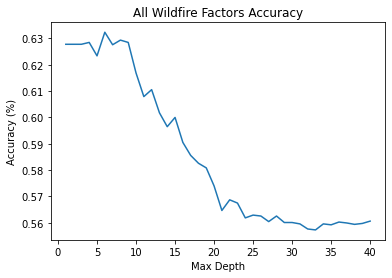

In [191]:
# Plot accuracy
# Check accuracy to see where the highest point is at
plt.plot(max_depth_range1, accuracy1)
plt.title('All Wildfire Factors Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy (%)')
plt.show()

The depth-6 tree achieves the best mean cross-validation accuracy 62.55952 +/- 0.39835% on training dataset


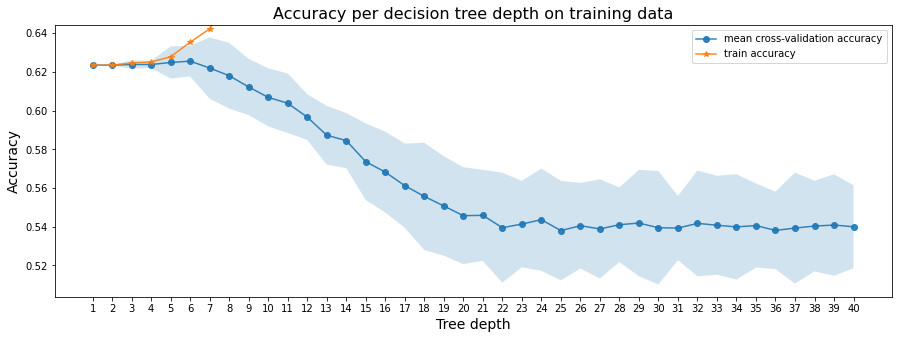

In [192]:
# Cross Validation
# Fitting trees of depth 1 to 40
sm_tree_depths = range(1, 41)
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_trees(X1_train, y1_train, 
                                                                                        sm_tree_depths)
# Plotting accuracy
plot_cross_validation_on_trees(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores, 
                               'Accuracy per decision tree depth on training data')

idx_max = sm_cv_scores_mean.argmax()
sm_best_tree_depth = sm_tree_depths[idx_max]
sm_best_tree_cv_score = sm_cv_scores_mean[idx_max]
sm_best_tree_cv_score_std = sm_cv_scores_std[idx_max]
print('The depth-{} tree achieves the best mean cross-validation accuracy {} +/- {}% on training dataset'.format(
      sm_best_tree_depth, round(sm_best_tree_cv_score*100,5), round(sm_best_tree_cv_score_std*100, 5)))

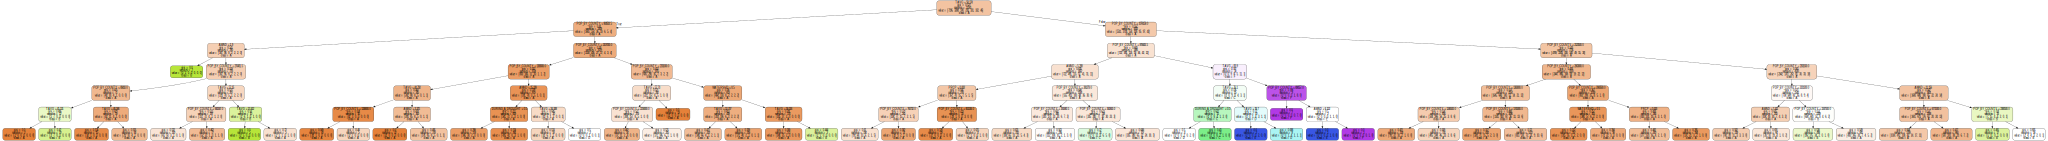

In [81]:
# Create visualization
dt1 = DecisionTreeClassifier(max_depth=6, random_state=0)
dt1.fit(X1_train, y1_train)

dot_data = tree.export_graphviz(dt1, out_file=None, 
                                feature_names=X1_test.columns,
                                class_names=['A', 'B', 'C', 'D', 'E', 'F', 'G'],
                                filled=True, rounded=True,
                                special_characters=True)  
graph = graphviz.Source(dot_data)
graph.format = "png"
graph.render('dt_all')
graph

## Dummy Classifier
The dummy classifier gives you a measure of “baseline” performance — i.e. the success rate one should expect to achieve even if simply guessing.

**Link**: https://medium.com/@mamonu/what-is-the-scikit-learn-dummy-classifier-95549d9cd44<br>
**Documentation**: https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html

In [307]:
# Dummy Classifier
# Create DummyClassifier class
dummy_clf = DummyClassifier(strategy="stratified", random_state=0)

# Train the model on the data
dummy_clf.fit(X1, y1)

# Train a dummy classifier to make predictions based on the class values
print('Prediction Values:', dummy_clf.predict(X1))

# Measuring model performance
print('Score:', dummy_clf.score(X1, y1))

Prediction Values: ['A' 'B' 'A' ... 'A' 'B' 'A']
Score: 0.47521188900499245


In [308]:
# Cross Validation
# Gather the mean and standard deviation of the accuracy
cv_scores = cross_val_score(dummy_clf, X1, y1, cv=5, scoring='accuracy')
sm_best_tree_cv_score = cv_scores.mean()
sm_best_tree_cv_score_std = cv_scores.std()
print('The best mean cross-validation accuracy {} +/- {}% on training dataset'.format(
      round(sm_best_tree_cv_score*100,5), round(sm_best_tree_cv_score_std*100, 5)))

The best mean cross-validation accuracy 47.81723 +/- 0.47223% on training dataset


#### 5x2cv Paired t Test

The 5x2cv paired t test is a procedure for comparing the performance of two models (classifiers or regressors). For this case we will compare the decision tree model with the dummy classifier.

**Link**: http://rasbt.github.io/mlxtend/user_guide/evaluate/paired_ttest_5x2cv/<br>
**Documentation**: http://rasbt.github.io/mlxtend/#welcome-to-mlxtends-documentation

In [309]:
# 5x2cv Paired t Test
t, p = paired_ttest_5x2cv(estimator1=dt1, estimator2=dummy_clf, X=X1, y=y1, random_seed=1)

print('t statistic: %.3f' % t)
print('p value: %.6f' % p)

t statistic: 8.611
p value: 0.000349


### Method 2: Climate Variables Only, Max Depth = 1
**ACCURACY**: 62.35161 +/- 0.00652%

In [88]:
# Create x and y Dataframes
X2 = wdf_df[['AWND', 'PRCP', 'TAVG']]
y2 = wdf_df['FIRE_SIZE_CLASS']

In [89]:
# Create train and test sets
# random_state as 42 is an arbitrary value
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.33, random_state=42)

In [90]:
# Create DecisionTreeClassifer class
dt2 = DecisionTreeClassifier(random_state=0)

In [91]:
# Train the model on the data
dt2.fit(X2_train, y2_train)

DecisionTreeClassifier(random_state=0)

In [92]:
# Measuring model performance
print('Score:', dt2.score(X2_test, y2_test))

Score: 0.5433597185576078


In [93]:
# Max depth of model
print(dt2.tree_.max_depth)

44


In [94]:
# Tuning the depth of a tree
# List of values to try for max_depth:
max_depth_range2 = list(range(1, 45))

# List to store the average RMSE for each value of max_depth:
accuracy2 = []
for depth in max_depth_range2:
    clf = DecisionTreeClassifier(max_depth = depth, random_state = 0)
    clf.fit(X2_train, y2_train)
    score = clf.score(X2_test, y2_test)
    accuracy2.append(score)

# Check the max_depth with the highest accuracy
[[max_depth_range2[i], accuracy2[i]] for i in range(44)]

[[1, 0.627792436235708],
 [2, 0.627792436235708],
 [3, 0.627792436235708],
 [4, 0.6270888302550571],
 [5, 0.6230430958663149],
 [6, 0.6244503078276166],
 [7, 0.6232189973614776],
 [8, 0.6218117854001759],
 [9, 0.6175901495162709],
 [10, 0.6175901495162709],
 [11, 0.6130167106420404],
 [12, 0.6103781882145998],
 [13, 0.6070360598065083],
 [14, 0.6028144239226033],
 [15, 0.5984168865435356],
 [16, 0.5866314863676341],
 [17, 0.5811785400175902],
 [18, 0.5743183817062445],
 [19, 0.5780123131046614],
 [20, 0.5760773966578716],
 [21, 0.5681618293755497],
 [22, 0.5618293755496921],
 [23, 0.5576077396657871],
 [24, 0.5572559366754617],
 [25, 0.552858399296394],
 [26, 0.5510993843447669],
 [27, 0.5484608619173263],
 [28, 0.5495162708883026],
 [29, 0.5484608619173263],
 [30, 0.5445910290237467],
 [31, 0.5452946350043976],
 [32, 0.5454705364995602],
 [33, 0.5433597185576078],
 [34, 0.5435356200527705],
 [35, 0.5417766051011433],
 [36, 0.53896218117854],
 [37, 0.5423043095866315],
 [38, 0.54300791

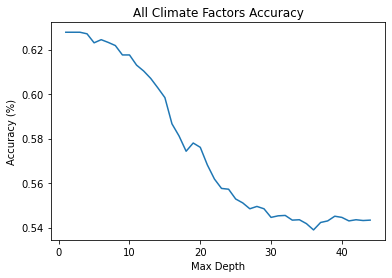

In [95]:
# Plot accuracy
# Check accuracy to see where the highest point is at
plt.plot(max_depth_range2, accuracy2)
plt.title('All Climate Factors Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy (%)')
plt.show()

The depth-1 tree achieves the best mean cross-validation accuracy 62.35161 +/- 0.00652% on training dataset


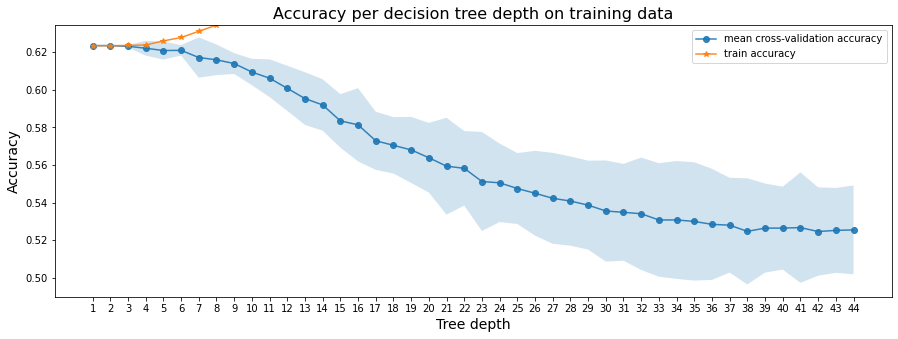

In [96]:
# Cross Validation
# Fitting trees of depth 1 to 44
sm_tree_depths = range(1, 45)
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_trees(X2_train, y2_train, 
                                                                                        sm_tree_depths)
# Plotting accuracy
plot_cross_validation_on_trees(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores, 
                               'Accuracy per decision tree depth on training data')

idx_max = sm_cv_scores_mean.argmax()
sm_best_tree_depth = sm_tree_depths[idx_max]
sm_best_tree_cv_score = sm_cv_scores_mean[idx_max]
sm_best_tree_cv_score_std = sm_cv_scores_std[idx_max]
print('The depth-{} tree achieves the best mean cross-validation accuracy {} +/- {}% on training dataset'.format(
      sm_best_tree_depth, round(sm_best_tree_cv_score*100,5), round(sm_best_tree_cv_score_std*100, 5)))

In [97]:
# Dummy Classifier
# Create DummyClassifier class
dummy_clf = DummyClassifier(strategy="stratified", random_state=0)

# Train the model on the data
dummy_clf.fit(X2, y2)

# Train a dummy classifier to make predictions based on the class values
print('Prediction Values:', dummy_clf.predict(X2))

# Measuring model performance
print('Score:', dummy_clf.score(X2, y2))

Prediction Values: ['A' 'B' 'A' ... 'A' 'B' 'A']
Score: 0.47521188900499245


In [98]:
# Cross Validation
# Gather the mean and standard deviation of the accuracy
cv_scores = cross_val_score(dummy_clf, X2, y2, cv=5, scoring='accuracy')
sm_best_tree_cv_score = cv_scores.mean()
sm_best_tree_cv_score_std = cv_scores.std()
print('The best mean cross-validation accuracy {} +/- {}% on training dataset'.format(
      round(sm_best_tree_cv_score*100,5), round(sm_best_tree_cv_score_std*100, 5)))

The best mean cross-validation accuracy 47.81723 +/- 0.47223% on training dataset


In [99]:
# 5x2cv Paired t Test
t, p = paired_ttest_5x2cv(estimator1=dt2, estimator2=dummy_clf, X=X2, y=y2, random_seed=1)

print('t statistic: %.3f' % t)
print('p value: %.6f' % p)

t statistic: 5.845
p value: 0.002075


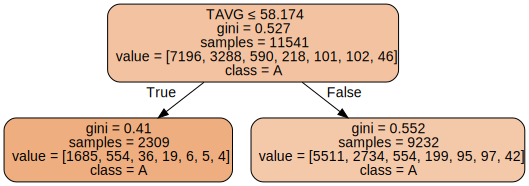

In [101]:
# Create visualization
dt2 = DecisionTreeClassifier(max_depth=1, random_state=0)
dt2.fit(X2_train, y2_train)

dot_data = tree.export_graphviz(dt2, out_file=None, 
                                feature_names=X2_test.columns,
                                class_names=['A', 'B', 'C', 'D', 'E', 'F', 'G'],
                                filled=True, rounded=True,
                                special_characters=True)  
graph = graphviz.Source(dot_data)
graph.format = "png"
graph.render('dt_climate_all')
graph

### Method 3: Drought and Watershed Factors, Max Depth = 1
**ACCURACY**: 62.35161 +/- 0.00652%

In [203]:
# Create x and y Dataframes
X3 = wdf_df[['DURING_A_DROUGHT', 'WATERSHD']]
y3 = wdf_df['FIRE_SIZE_CLASS']

In [204]:
# Create train and test sets
# random_state as 42 is an arbitrary value
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.33, random_state=42)

In [205]:
# Create DecisionTreeClassifer class
dt3 = DecisionTreeClassifier(random_state=0)

In [206]:
# Train the model on the data
dt3.fit(X3_train, y3_train)

DecisionTreeClassifier(random_state=0)

In [207]:
# Measuring model performance
print('Score:', dt3.score(X3_test, y3_test))

Score: 0.627792436235708


In [208]:
# Max depth of model
print(dt3.tree_.max_depth)

2


In [209]:
# Tuning the depth of a tree
# List of values to try for max_depth:
max_depth_range3 = list(range(1, 3))

# List to store the average RMSE for each value of max_depth:
accuracy3 = []
for depth in max_depth_range3:
    clf = DecisionTreeClassifier(max_depth = depth, random_state = 0)
    clf.fit(X3_train, y3_train)
    score = clf.score(X3_test, y3_test)
    accuracy3.append(score)

# Check the max_depth with the highest accuracy
[[max_depth_range3[i], accuracy3[i]] for i in range(2)]

[[1, 0.627792436235708], [2, 0.627792436235708]]

The depth-1 tree achieves the best mean cross-validation accuracy 62.35161 +/- 0.00652% on training dataset


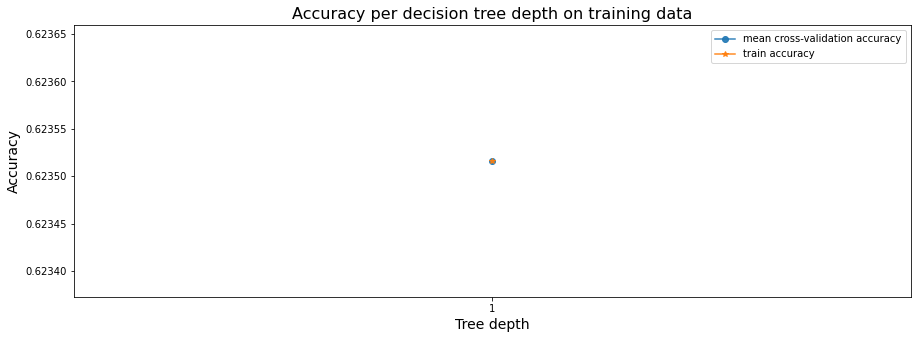

In [210]:
# Cross Validation
# Fitting trees of depth 1
sm_tree_depths = range(1, 2)
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_trees(X3_train, y3_train, 
                                                                                        sm_tree_depths)
# Plotting accuracy
plot_cross_validation_on_trees(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores, 
                               'Accuracy per decision tree depth on training data')

idx_max = sm_cv_scores_mean.argmax()
sm_best_tree_depth = sm_tree_depths[idx_max]
sm_best_tree_cv_score = sm_cv_scores_mean[idx_max]
sm_best_tree_cv_score_std = sm_cv_scores_std[idx_max]
print('The depth-{} tree achieves the best mean cross-validation accuracy {} +/- {}% on training dataset'.format(
      sm_best_tree_depth, round(sm_best_tree_cv_score*100,5), round(sm_best_tree_cv_score_std*100, 5)))

In [324]:
# Dummy Classifier
# Create DummyClassifier class
dummy_clf = DummyClassifier(strategy="stratified", random_state=0)

# Train the model on the data
dummy_clf.fit(X3, y3)

# Train a dummy classifier to make predictions based on the class values
print('Prediction Values:', dummy_clf.predict(X3))

# Measuring model performance
print('Score:', dummy_clf.score(X3, y3))

Prediction Values: ['A' 'B' 'A' ... 'A' 'B' 'A']
Score: 0.47521188900499245


In [325]:
# Cross Validation
# Gather the mean and standard deviation of the accuracy
cv_scores = cross_val_score(dummy_clf, X3, y3, cv=5, scoring='accuracy')
sm_best_tree_cv_score = cv_scores.mean()
sm_best_tree_cv_score_std = cv_scores.std()
print('The best mean cross-validation accuracy {} +/- {}% on training dataset'.format(
      round(sm_best_tree_cv_score*100,5), round(sm_best_tree_cv_score_std*100, 5)))

The best mean cross-validation accuracy 47.81723 +/- 0.47223% on training dataset


In [328]:
# 5x2cv Paired t Test
t, p = paired_ttest_5x2cv(estimator1=dt3, estimator2=dummy_clf, X=X3, y=y3, random_seed=1)

print('t statistic: %.3f' % t)
print('p value: %.9f' % p)

t statistic: 37.094
p value: 0.000000268


### Method 4: Population By County Factor Only, Max Depth = 13
**ACCURACY**: 64.13653 +/- 0.29624%

In [29]:
# Create x and y Dataframes
X4 = wdf_df[['POP_BY_COUNTY']]
y4 = wdf_df['FIRE_SIZE_CLASS']

In [30]:
# Create train and test sets
# random_state as 42 is an arbitrary value
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.33, random_state=42)

In [31]:
# Create DecisionTreeClassifer class
dt4 = DecisionTreeClassifier(random_state=0)

In [32]:
# Train the model on the data
dt4.fit(X4_train, y4_train)

DecisionTreeClassifier(random_state=0)

In [33]:
# Measuring model performance
dt4.score(X4_test, y4_test)

0.643447669305189

In [34]:
# Max depth of model
print(dt4.tree_.max_depth)

16


In [35]:
# Tuning the depth of a tree
# List of values to try for max_depth:
max_depth_range4 = list(range(1, 17))

# List to store the average RMSE for each value of max_depth:
accuracy4 = []
for depth in max_depth_range4:
    clf = DecisionTreeClassifier(max_depth = depth, random_state = 0)
    clf.fit(X4_train, y4_train)
    score = clf.score(X4_test, y4_test)
    accuracy4.append(score)

# Check the max_depth with the highest accuracy
[[max_depth_range4[i], accuracy4[i]] for i in range(16)]

[[1, 0.627792436235708],
 [2, 0.627792436235708],
 [3, 0.6286719437115216],
 [4, 0.6286719437115216],
 [5, 0.6328935795954266],
 [6, 0.6406332453825857],
 [7, 0.6406332453825857],
 [8, 0.6429199648197009],
 [9, 0.6432717678100264],
 [10, 0.6448548812664908],
 [11, 0.6436235708003518],
 [12, 0.6439753737906773],
 [13, 0.6439753737906773],
 [14, 0.643447669305189],
 [15, 0.643447669305189],
 [16, 0.643447669305189]]

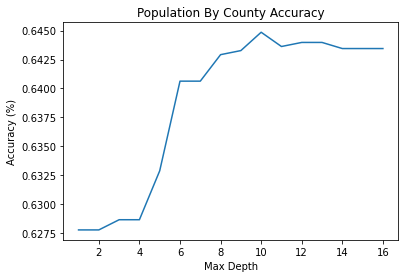

In [36]:
# Plot accuracy
# Check accuracy to see where the highest point is at
plt.plot(max_depth_range4, accuracy4)
plt.title('Population By County Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy (%)')
plt.show()

The depth-13 tree achieves the best mean cross-validation accuracy 64.13653 +/- 0.29624% on training dataset


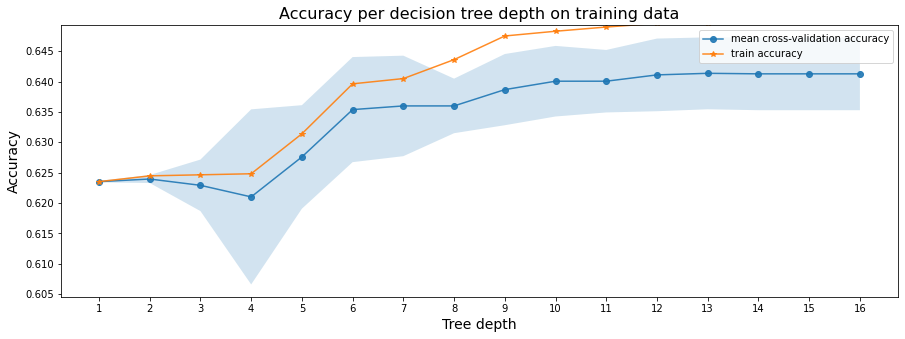

In [37]:
# Cross Validation
# Fitting trees of depth 1 to 16
sm_tree_depths = range(1, 17)
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_trees(X4_train, y4_train, 
                                                                                        sm_tree_depths)
# Plotting accuracy
plot_cross_validation_on_trees(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores, 
                               'Accuracy per decision tree depth on training data')

idx_max = sm_cv_scores_mean.argmax()
sm_best_tree_depth = sm_tree_depths[idx_max]
sm_best_tree_cv_score = sm_cv_scores_mean[idx_max]
sm_best_tree_cv_score_std = sm_cv_scores_std[idx_max]
print('The depth-{} tree achieves the best mean cross-validation accuracy {} +/- {}% on training dataset'.format(
      sm_best_tree_depth, round(sm_best_tree_cv_score*100,5), round(sm_best_tree_cv_score_std*100, 5)))

In [38]:
# Dummy Classifier
# Create DummyClassifier class
dummy_clf = DummyClassifier(strategy="stratified", random_state=0)

# Train the model on the data
dummy_clf.fit(X4, y4)

# Train a dummy classifier to make predictions based on the class values
print('Prediction Values:', dummy_clf.predict(X4))

# Measuring model performance
print('Score:', dummy_clf.score(X4, y4))

Prediction Values: ['A' 'B' 'A' ... 'A' 'B' 'A']
Score: 0.47521188900499245


In [39]:
# Cross Validation
# Gather the mean and standard deviation of the accuracy
cv_scores = cross_val_score(dummy_clf, X4, y4, cv=5, scoring='accuracy')
sm_best_tree_cv_score = cv_scores.mean()
sm_best_tree_cv_score_std = cv_scores.std()
print('The best mean cross-validation accuracy {} +/- {}% on training dataset'.format(
      round(sm_best_tree_cv_score*100,5), round(sm_best_tree_cv_score_std*100, 5)))

The best mean cross-validation accuracy 47.81723 +/- 0.47223% on training dataset


In [40]:
# 5x2cv Paired t Test
t, p = paired_ttest_5x2cv(estimator1=dt4, estimator2=dummy_clf, X=X4, y=y4, random_seed=1)

print('t statistic: %.3f' % t)
print('p value: %.9f' % p)

t statistic: 35.651
p value: 0.000000327


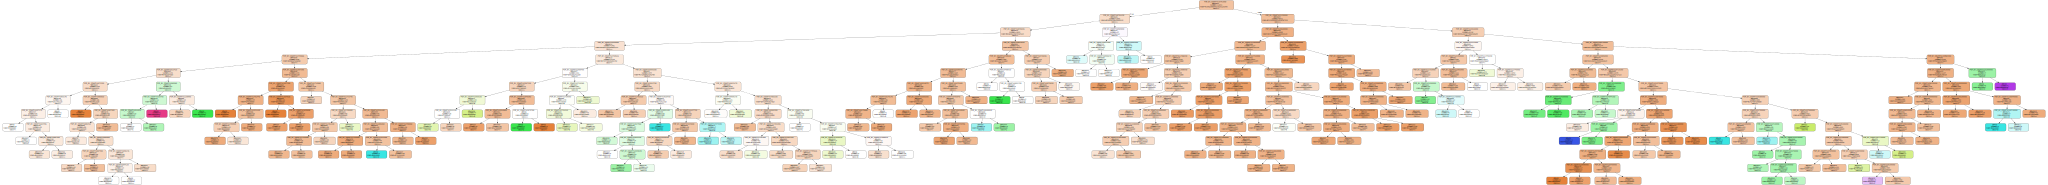

In [118]:
# Create visualization
dt4 = DecisionTreeClassifier(max_depth=13, random_state=0)
dt4.fit(X4_train, y4_train)

dot_data = tree.export_graphviz(dt4, out_file=None, 
                                feature_names=X4_test.columns,
                                class_names=['A', 'B', 'C', 'D', 'E', 'F', 'G'],
                                filled=True, rounded=True,
                                special_characters=True)  
graph = graphviz.Source(dot_data)
graph.format = "png"
graph.render('dt_pop_by_county')
graph

### Method 5: Average Wind Speed (AWND) Only, Max Depth = 3
**ACCURACY**: 62.36895 +/- 0.03363%

In [102]:
# Create x and y Dataframes
X5 = wdf_df[['AWND']]
y5 = wdf_df['FIRE_SIZE_CLASS']

In [103]:
# Create train and test sets
# random_state as 42 is an arbitrary value
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5, test_size=0.33, random_state=42)

In [104]:
# Create DecisionTreeClassifer class
dt5 = DecisionTreeClassifier(random_state=0)

In [105]:
# Train the model on the data
dt5.fit(X5_train, y5_train)

DecisionTreeClassifier(random_state=0)

In [106]:
# Measuring model performance
dt5.score(X5_test, y5_test)

0.5982409850483729

In [107]:
# Max depth of model
print(dt5.tree_.max_depth)

36


In [108]:
# Tuning the depth of a tree
# List of values to try for max_depth:
max_depth_range5 = list(range(1, 37))

# List to store the average RMSE for each value of max_depth:
accuracy5 = []
for depth in max_depth_range5:
    clf = DecisionTreeClassifier(max_depth = depth, random_state = 0)
    clf.fit(X5_train, y5_train)
    score = clf.score(X5_test, y5_test)
    accuracy5.append(score)

# Check the max_depth with the highest accuracy
[[max_depth_range5[i], accuracy5[i]] for i in range(36)]

[[1, 0.627792436235708],
 [2, 0.6270888302550571],
 [3, 0.6269129287598945],
 [4, 0.6276165347405452],
 [5, 0.6276165347405452],
 [6, 0.6272647317502199],
 [7, 0.6244503078276166],
 [8, 0.6242744063324538],
 [9, 0.623570800351803],
 [10, 0.6237467018469657],
 [11, 0.6230430958663149],
 [12, 0.622339489885664],
 [13, 0.6191732629727352],
 [14, 0.6174142480211082],
 [15, 0.61688654353562],
 [16, 0.6142480211081794],
 [17, 0.6140721196130167],
 [18, 0.613896218117854],
 [19, 0.6114335971855761],
 [20, 0.6082673702726473],
 [21, 0.606684256816183],
 [22, 0.605452946350044],
 [23, 0.6035180299032542],
 [24, 0.6026385224274406],
 [25, 0.6017590149516271],
 [26, 0.6007036059806509],
 [27, 0.6021108179419525],
 [28, 0.6008795074758135],
 [29, 0.5996481970096745],
 [30, 0.6],
 [31, 0.5992963940193492],
 [32, 0.5987686895338611],
 [33, 0.5984168865435356],
 [34, 0.5982409850483729],
 [35, 0.5982409850483729],
 [36, 0.5982409850483729]]

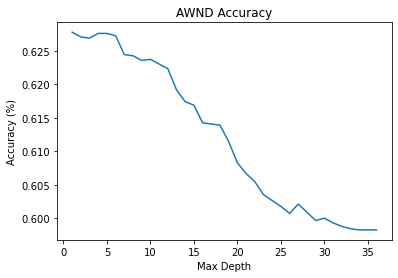

In [109]:
# Plot accuracy
# Check accuracy to see where the highest point is at
plt.plot(max_depth_range5, accuracy5)
plt.title('AWND Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy (%)')
plt.show()

The depth-3 tree achieves the best mean cross-validation accuracy 62.36895 +/- 0.03363% on training dataset


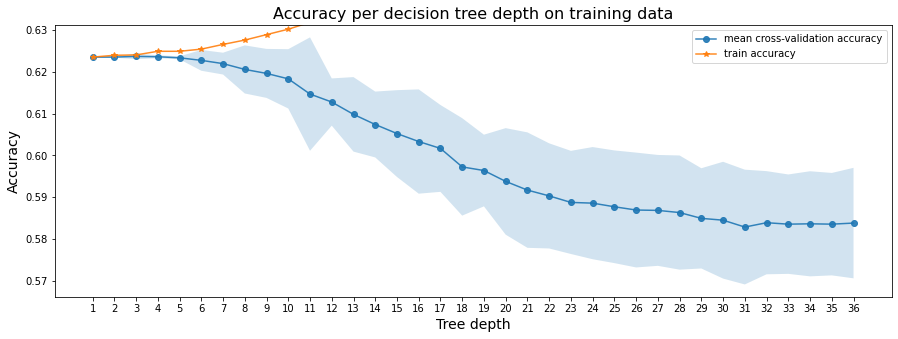

In [110]:
# Cross Validation
# Fitting trees of depth 1 to 36
sm_tree_depths = range(1, 37)
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_trees(X5_train, y5_train, 
                                                                                        sm_tree_depths)
# Plotting accuracy
plot_cross_validation_on_trees(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores, 
                               'Accuracy per decision tree depth on training data')

idx_max = sm_cv_scores_mean.argmax()
sm_best_tree_depth = sm_tree_depths[idx_max]
sm_best_tree_cv_score = sm_cv_scores_mean[idx_max]
sm_best_tree_cv_score_std = sm_cv_scores_std[idx_max]
print('The depth-{} tree achieves the best mean cross-validation accuracy {} +/- {}% on training dataset'.format(
      sm_best_tree_depth, round(sm_best_tree_cv_score*100,5), round(sm_best_tree_cv_score_std*100, 5)))

In [111]:
# Dummy Classifier
# Create DummyClassifier class
dummy_clf = DummyClassifier(strategy="stratified", random_state=0)

# Train the model on the data
dummy_clf.fit(X5, y5)

# Train a dummy classifier to make predictions based on the class values
print('Prediction Values:', dummy_clf.predict(X5))

# Measuring model performance
print('Score:', dummy_clf.score(X5, y5))

Prediction Values: ['A' 'B' 'A' ... 'A' 'B' 'A']
Score: 0.47521188900499245


In [112]:
# Cross Validation
# Gather the mean and standard deviation of the accuracy
cv_scores = cross_val_score(dummy_clf, X5, y5, cv=5, scoring='accuracy')
sm_best_tree_cv_score = cv_scores.mean()
sm_best_tree_cv_score_std = cv_scores.std()
print('The best mean cross-validation accuracy {} +/- {}% on training dataset'.format(
      round(sm_best_tree_cv_score*100,5), round(sm_best_tree_cv_score_std*100, 5)))

The best mean cross-validation accuracy 47.81723 +/- 0.47223% on training dataset


In [113]:
# 5x2cv Paired t Test
t, p = paired_ttest_5x2cv(estimator1=dt5, estimator2=dummy_clf, X=X5, y=y5, random_seed=1)

print('t statistic: %.3f' % t)
print('p value: %.7f' % p)

t statistic: 16.306
p value: 0.0000158


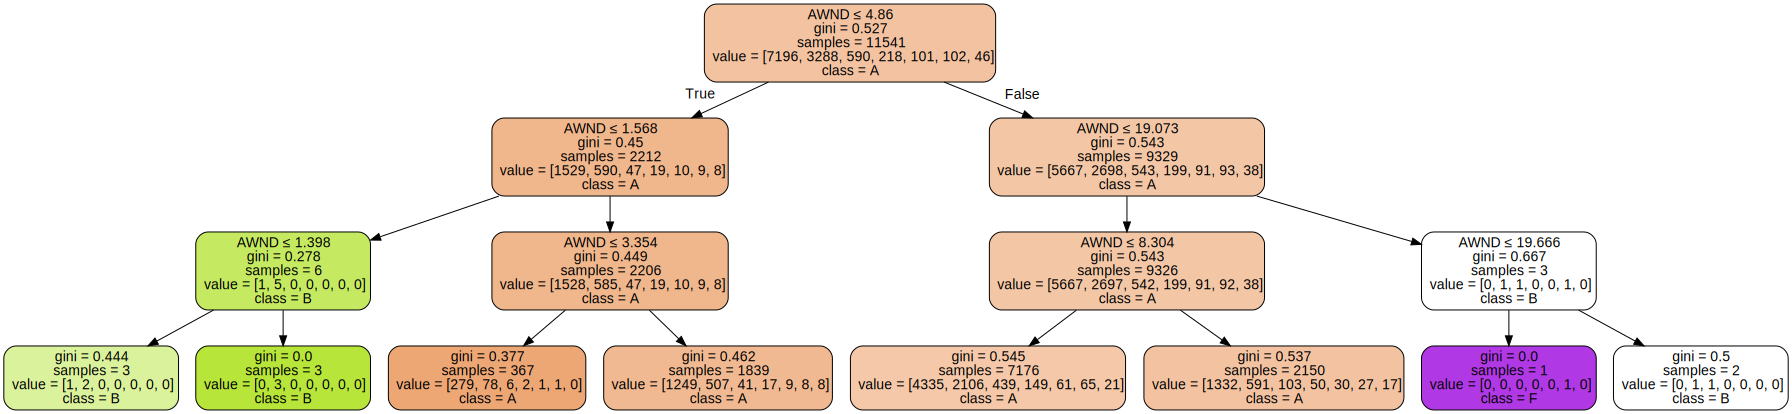

In [117]:
# Create visualization
dt5 = DecisionTreeClassifier(max_depth=3, random_state=0)
dt5.fit(X5_train, y5_train)

dot_data = tree.export_graphviz(dt5, out_file=None, 
                                feature_names=X5_test.columns,
                                class_names=['A', 'B', 'C', 'D', 'E', 'F', 'G'],
                                filled=True, rounded=True,
                                special_characters=True)  
graph = graphviz.Source(dot_data)
graph.format = "png"
graph.render('dt_awnd')
graph

### Method 6: Precipitation (PRCP) Only, Max Depth = 1
**ACCURACY**: 62.35161 +/- 0.00652%

In [229]:
# Create x and y Dataframes
X6 = wdf_df[['PRCP']]
y6 = wdf_df['FIRE_SIZE_CLASS']

In [230]:
# Create train and test sets
# random_state as 42 is an arbitrary value
X6_train, X6_test, y6_train, y6_test = train_test_split(X6, y6, test_size=0.33, random_state=42)

In [231]:
# Create DecisionTreeClassifer class
dt6 = DecisionTreeClassifier(random_state=0)

In [232]:
# Train the model on the data
dt6.fit(X6_train, y6_train)

DecisionTreeClassifier(random_state=0)

In [233]:
# Measuring model performance
dt6.score(X6_test, y6_test)

0.6089709762532981

In [234]:
# Max depth of model
print(dt6.tree_.max_depth)

31


In [235]:
# Tuning the depth of a tree
# List of values to try for max_depth:
max_depth_range6 = list(range(1, 32))

# List to store the average RMSE for each value of max_depth:
accuracy6 = []
for depth in max_depth_range6:
    clf = DecisionTreeClassifier(max_depth = depth, random_state = 0)
    clf.fit(X6_train, y6_train)
    score = clf.score(X6_test, y6_test)
    accuracy6.append(score)

# Check the max_depth with the highest accuracy
[[max_depth_range6[i], accuracy6[i]] for i in range(31)]

[[1, 0.627792436235708],
 [2, 0.627792436235708],
 [3, 0.627792436235708],
 [4, 0.6272647317502199],
 [5, 0.6263852242744063],
 [6, 0.6263852242744063],
 [7, 0.6260334212840809],
 [8, 0.6242744063324538],
 [9, 0.622339489885664],
 [10, 0.623570800351803],
 [11, 0.6207563764291997],
 [12, 0.6197009674582233],
 [13, 0.6189973614775726],
 [14, 0.6191732629727352],
 [15, 0.618117854001759],
 [16, 0.6175901495162709],
 [17, 0.6170624450307828],
 [18, 0.6156552330694811],
 [19, 0.6147757255936676],
 [20, 0.6114335971855761],
 [21, 0.610905892700088],
 [22, 0.610905892700088],
 [23, 0.6107299912049252],
 [24, 0.6102022867194371],
 [25, 0.6091468777484609],
 [26, 0.6093227792436235],
 [27, 0.6091468777484609],
 [28, 0.6080914687774847],
 [29, 0.6086191732629728],
 [30, 0.6089709762532981],
 [31, 0.6089709762532981]]

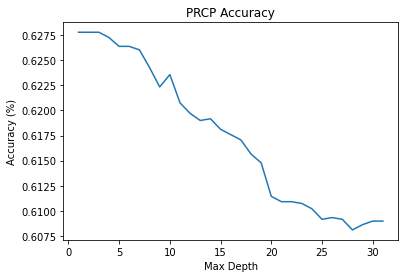

In [236]:
# Plot accuracy
# Check accuracy to see where the highest point is at.
plt.plot(max_depth_range6, accuracy6)
plt.title('PRCP Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy (%)')
plt.show()

The depth-1 tree achieves the best mean cross-validation accuracy 62.35161 +/- 0.00652% on training dataset


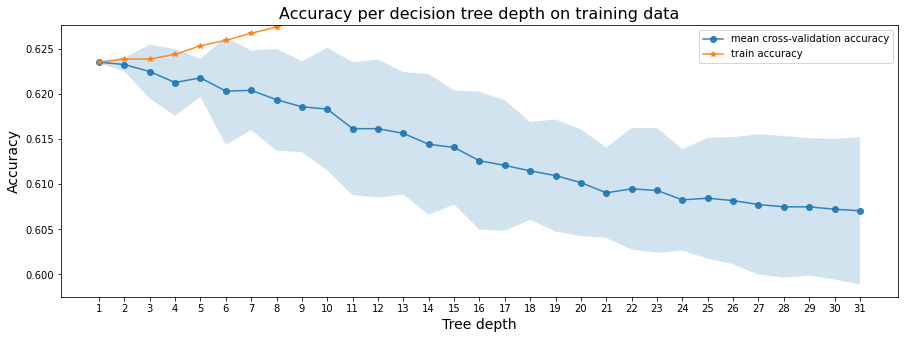

In [237]:
# Cross Validation
# Fitting trees of depth 1 to 31
sm_tree_depths = range(1, 32)
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_trees(X6_train, y6_train, 
                                                                                        sm_tree_depths)
# Plotting accuracy
plot_cross_validation_on_trees(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores, 
                               'Accuracy per decision tree depth on training data')

idx_max = sm_cv_scores_mean.argmax()
sm_best_tree_depth = sm_tree_depths[idx_max]
sm_best_tree_cv_score = sm_cv_scores_mean[idx_max]
sm_best_tree_cv_score_std = sm_cv_scores_std[idx_max]
print('The depth-{} tree achieves the best mean cross-validation accuracy {} +/- {}% on training dataset'.format(
      sm_best_tree_depth, round(sm_best_tree_cv_score*100,5), round(sm_best_tree_cv_score_std*100, 5)))

In [337]:
# Dummy Classifier
# Create DummyClassifier class
dummy_clf = DummyClassifier(strategy="stratified", random_state=0)

# Train the model on the data
dummy_clf.fit(X6, y6)

# Train a dummy classifier to make predictions based on the class values
print('Prediction Values:', dummy_clf.predict(X6))

# Measuring model performance
print('Score:', dummy_clf.score(X6, y6))

Prediction Values: ['A' 'B' 'A' ... 'A' 'B' 'A']
Score: 0.47521188900499245


In [338]:
# Cross Validation
# Gather the mean and standard deviation of the accuracy
cv_scores = cross_val_score(dummy_clf, X6, y6, cv=5, scoring='accuracy')
sm_best_tree_cv_score = cv_scores.mean()
sm_best_tree_cv_score_std = cv_scores.std()
print('The best mean cross-validation accuracy {} +/- {}% on training dataset'.format(
      round(sm_best_tree_cv_score*100,5), round(sm_best_tree_cv_score_std*100, 5)))

The best mean cross-validation accuracy 47.81723 +/- 0.47223% on training dataset


In [340]:
# 5x2cv Paired t Test
t, p = paired_ttest_5x2cv(estimator1=dt6, estimator2=dummy_clf, X=X6, y=y6, random_seed=1)

print('t statistic: %.3f' % t)
print('p value: %.9f' % p)

t statistic: 39.005
p value: 0.000000209


### Method 7: Average Temperature (TAVG) Only, Max Depth = 3
Check the "TAVG Accuracy" table for the reason why max_depth=3 has the highest accuracy.<br>
**ACCURACY: 62.36028 +/- 0.01692%**

In [238]:
# Create x and y Dataframes
X7 = wdf_df[['TAVG']]
y7 = wdf_df['FIRE_SIZE_CLASS']

In [239]:
# Create train and test sets
# random_state as 42 is an arbitrary value
X7_train, X7_test, y7_train, y7_test = train_test_split(X7, y7, test_size=0.33, random_state=42)

In [240]:
# Create DecisionTreeClassifer class
dt7 = DecisionTreeClassifier(random_state=0)

In [241]:
# Train the model on the data
dt7.fit(X7_train, y7_train)

DecisionTreeClassifier(random_state=0)

In [242]:
# Measuring model performance
dt7.score(X7_test, y7_test)

0.5695690413368514

In [243]:
# Max depth of model
print(dt7.tree_.max_depth)

49


In [244]:
# Tuning the depth of a tree
# List of values to try for max_depth:
max_depth_range7 = list(range(1, 51))

# List to store the average RMSE for each value of max_depth:
accuracy7 = []
for depth in max_depth_range7:
    clf = DecisionTreeClassifier(max_depth = depth, random_state = 0)
    clf.fit(X7_train, y7_train)
    score = clf.score(X7_test, y7_test)
    accuracy7.append(score)

# Check the max_depth with the highest accuracy
[[max_depth_range7[i], accuracy7[i]] for i in range(50)]

[[1, 0.627792436235708],
 [2, 0.627792436235708],
 [3, 0.6276165347405452],
 [4, 0.627792436235708],
 [5, 0.6274406332453826],
 [6, 0.6263852242744063],
 [7, 0.6283201407211961],
 [8, 0.6283201407211961],
 [9, 0.6249780123131047],
 [10, 0.6205804749340369],
 [11, 0.6144239226033421],
 [12, 0.6123131046613897],
 [13, 0.6119613016710642],
 [14, 0.6087950747581354],
 [15, 0.6047493403693931],
 [16, 0.6017590149516271],
 [17, 0.5964819700967459],
 [18, 0.5934916446789797],
 [19, 0.5890941072999121],
 [20, 0.5894459102902375],
 [21, 0.5855760773966578],
 [22, 0.5824098504837291],
 [23, 0.578891820580475],
 [24, 0.5811785400175902],
 [25, 0.5778364116094987],
 [26, 0.578891820580475],
 [27, 0.5783641160949868],
 [28, 0.5774846086191733],
 [29, 0.5750219876868954],
 [30, 0.575197889182058],
 [31, 0.5744942832014072],
 [32, 0.5732629727352683],
 [33, 0.5718557607739666],
 [34, 0.569744942832014],
 [35, 0.5704485488126649],
 [36, 0.5690413368513633],
 [37, 0.569744942832014],
 [38, 0.5699208443

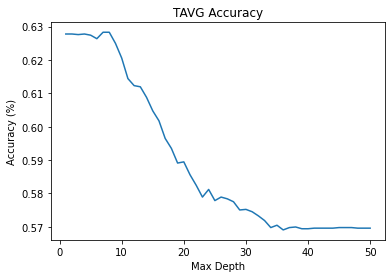

In [245]:
# Plot accuracy
# Check accuracy to see where the highest point is at
plt.plot(max_depth_range7, accuracy7)
plt.title('TAVG Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy (%)')
plt.show()

The depth-3 tree achieves the best mean cross-validation accuracy 62.36028 +/- 0.01692% on training dataset


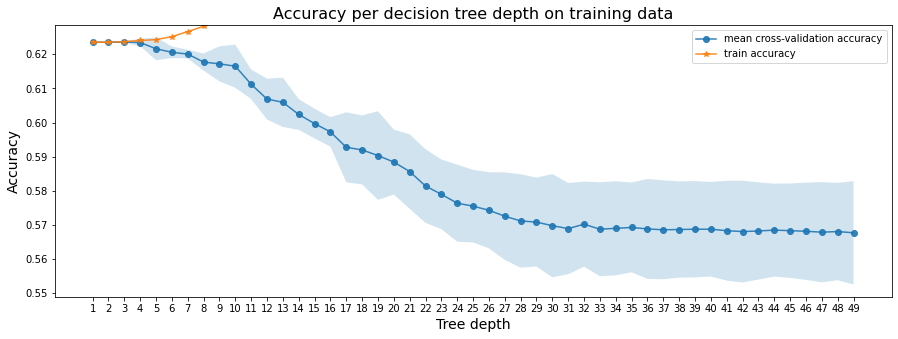

In [246]:
# Cross Validation
# Fitting trees of depth 1 to 49
sm_tree_depths = range(1, 50)
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_trees(X7_train, y7_train, 
                                                                                        sm_tree_depths)
# Plotting accuracy
plot_cross_validation_on_trees(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores, 
                               'Accuracy per decision tree depth on training data')

idx_max = sm_cv_scores_mean.argmax()
sm_best_tree_depth = sm_tree_depths[idx_max]
sm_best_tree_cv_score = sm_cv_scores_mean[idx_max]
sm_best_tree_cv_score_std = sm_cv_scores_std[idx_max]
print('The depth-{} tree achieves the best mean cross-validation accuracy {} +/- {}% on training dataset'.format(
      sm_best_tree_depth, round(sm_best_tree_cv_score*100,5), round(sm_best_tree_cv_score_std*100, 5)))

In [341]:
# Dummy Classifier
# Create DummyClassifier class
dummy_clf = DummyClassifier(strategy="stratified", random_state=0)

# Train the model on the data
dummy_clf.fit(X7, y7)

# Train a dummy classifier to make predictions based on the class values
print('Prediction Values:', dummy_clf.predict(X7))

# Measuring model performance
print('Score:', dummy_clf.score(X7, y7))

Prediction Values: ['A' 'B' 'A' ... 'A' 'B' 'A']
Score: 0.47521188900499245


In [342]:
# Cross Validation
# Gather the mean and standard deviation of the accuracy
cv_scores = cross_val_score(dummy_clf, X7, y7, cv=5, scoring='accuracy')
sm_best_tree_cv_score = cv_scores.mean()
sm_best_tree_cv_score_std = cv_scores.std()
print('The best mean cross-validation accuracy {} +/- {}% on training dataset'.format(
      round(sm_best_tree_cv_score*100,5), round(sm_best_tree_cv_score_std*100, 5)))

The best mean cross-validation accuracy 47.81723 +/- 0.47223% on training dataset


In [344]:
# 5x2cv Paired t Test
t, p = paired_ttest_5x2cv(estimator1=dt7, estimator2=dummy_clf, X=X7, y=y7, random_seed=1)

print('t statistic: %.3f' % t)
print('p value: %.7f' % p)

t statistic: 14.936
p value: 0.0000244


### Method 8: Drought, Watershed, and Population by County Factors, Max Depth = 10
**ACCURACY**: 63.99791 +/- 0.50881%

In [247]:
# Create x and y Dataframes
X8 = wdf_df[['DURING_A_DROUGHT', 'WATERSHD', 'POP_BY_COUNTY']]
y8 = wdf_df['FIRE_SIZE_CLASS']

In [248]:
# Create train and test sets
# random_state as 42 is an arbitrary value
X8_train, X8_test, y8_train, y8_test = train_test_split(X8, y8, test_size=0.33, random_state=42)

In [249]:
# Create DecisionTreeClassifer class
dt8 = DecisionTreeClassifier(random_state=0)

In [250]:
# Train the model on the data
dt8.fit(X8_train, y8_train)

DecisionTreeClassifier(random_state=0)

In [251]:
# Measuring model performance
dt8.score(X8_test, y8_test)

0.6415127528583993

In [252]:
# Max depth of model
print(dt8.tree_.max_depth)

18


In [253]:
# Tuning the depth of a tree
# List of values to try for max_depth:
max_depth_range8 = list(range(1, 19))

# List to store the average RMSE for each value of max_depth:
accuracy8 = []
for depth in max_depth_range8:
    clf = DecisionTreeClassifier(max_depth = depth, random_state = 0)
    clf.fit(X8_train, y8_train)
    score = clf.score(X8_test, y8_test)
    accuracy8.append(score)

# Check the max_depth with the highest accuracy
[[max_depth_range8[i], accuracy8[i]] for i in range(18)]

[[1, 0.627792436235708],
 [2, 0.627792436235708],
 [3, 0.6281442392260335],
 [4, 0.6281442392260335],
 [5, 0.6323658751099385],
 [6, 0.639226033421284],
 [7, 0.6406332453825857],
 [8, 0.6402814423922604],
 [9, 0.6401055408970976],
 [10, 0.6427440633245383],
 [11, 0.641688654353562],
 [12, 0.6425681618293756],
 [13, 0.6422163588390501],
 [14, 0.6415127528583993],
 [15, 0.6415127528583993],
 [16, 0.6415127528583993],
 [17, 0.6415127528583993],
 [18, 0.6415127528583993]]

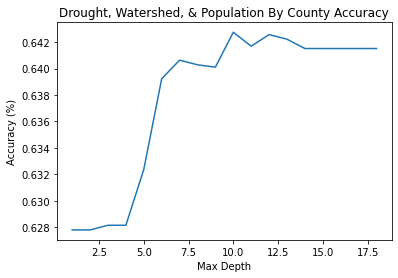

In [254]:
# Plot accuracy
# Check accuracy to see where the highest point is at
plt.plot(max_depth_range8, accuracy8)
plt.title('Drought, Watershed, & Population By County Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy (%)')
plt.show()

The depth-10 tree achieves the best mean cross-validation accuracy 63.98058 +/- 0.53172% on training dataset


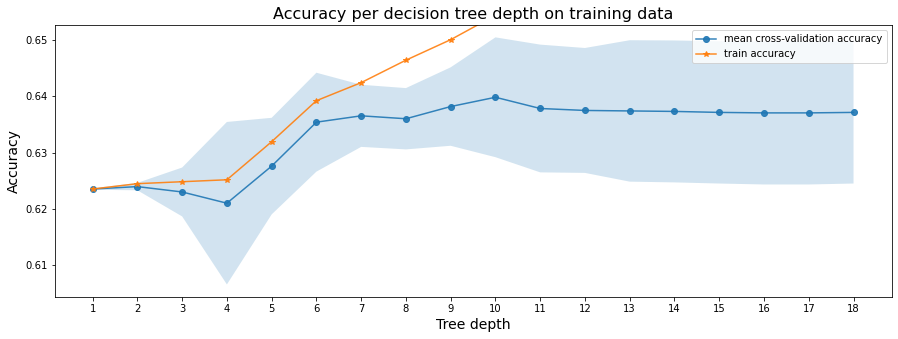

In [255]:
# Cross Validation
# Fitting trees of depth 1 to 18
sm_tree_depths = range(1, 19)
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_trees(X8_train, y8_train, 
                                                                                        sm_tree_depths)
# Plotting accuracy
plot_cross_validation_on_trees(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores, 
                               'Accuracy per decision tree depth on training data')

idx_max = sm_cv_scores_mean.argmax()
sm_best_tree_depth = sm_tree_depths[idx_max]
sm_best_tree_cv_score = sm_cv_scores_mean[idx_max]
sm_best_tree_cv_score_std = sm_cv_scores_std[idx_max]
print('The depth-{} tree achieves the best mean cross-validation accuracy {} +/- {}% on training dataset'.format(
      sm_best_tree_depth, round(sm_best_tree_cv_score*100,5), round(sm_best_tree_cv_score_std*100, 5)))

In [345]:
# Dummy Classifier
# Create DummyClassifier class
dummy_clf = DummyClassifier(strategy="stratified", random_state=0)

# Train the model on the data
dummy_clf.fit(X8, y8)

# Train a dummy classifier to make predictions based on the class values
print('Prediction Values:', dummy_clf.predict(X8))

# Measuring model performance
print('Score:', dummy_clf.score(X8, y8))

Prediction Values: ['A' 'B' 'A' ... 'A' 'B' 'A']
Score: 0.47521188900499245


In [346]:
# Cross Validation
# Gather the mean and standard deviation of the accuracy
cv_scores = cross_val_score(dummy_clf, X8, y8, cv=5, scoring='accuracy')
sm_best_tree_cv_score = cv_scores.mean()
sm_best_tree_cv_score_std = cv_scores.std()
print('The best mean cross-validation accuracy {} +/- {}% on training dataset'.format(
      round(sm_best_tree_cv_score*100,5), round(sm_best_tree_cv_score_std*100, 5)))

The best mean cross-validation accuracy 47.81723 +/- 0.47223% on training dataset


In [349]:
# 5x2cv Paired t Test
t, p = paired_ttest_5x2cv(estimator1=dt8, estimator2=dummy_clf, X=X8, y=y8, random_seed=1)

print('t statistic: %.3f' % t)
print('p value: %.10f' % p)

t statistic: 47.998
p value: 0.0000000742


### Method 9: Drought Factor Only, Max Depth = 1
**ACCURACY**: 62.35161 +/- 0.00652%

In [256]:
# Create x and y Dataframes
X9 = wdf_df[['DURING_A_DROUGHT']]
y9 = wdf_df['FIRE_SIZE_CLASS']

In [257]:
# Create train and test sets
# random_state as 42 is an arbitrary value
X9_train, X9_test, y9_train, y9_test = train_test_split(X9, y9, test_size=0.33, random_state=42)

In [258]:
# Create DecisionTreeClassifer class
dt9 = DecisionTreeClassifier(random_state=0)

In [259]:
# Train the model on the data
dt9.fit(X9_train, y9_train)

DecisionTreeClassifier(random_state=0)

In [260]:
# Measuring model performance
dt9.score(X9_test, y9_test)

0.627792436235708

In [261]:
# Max depth of model
print(dt9.tree_.max_depth)

1


In [262]:
# Tuning the depth of a tree
# List of values to try for max_depth:
max_depth_range9 = list(range(1, 3))

# List to store the average RMSE for each value of max_depth:
accuracy9 = []
for depth in max_depth_range9:
    clf = DecisionTreeClassifier(max_depth = depth, random_state = 0)
    clf.fit(X9_train, y9_train)
    score = clf.score(X9_test, y9_test)
    accuracy9.append(score)

# Check the max_depth with the highest accuracy
[[max_depth_range9[i], accuracy9[i]] for i in range(2)]

[[1, 0.627792436235708], [2, 0.627792436235708]]

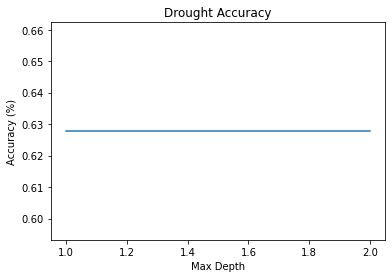

In [263]:
# Plot accuracy
# Check accuracy to see where the highest point is at
plt.plot(max_depth_range9, accuracy9)
plt.title('Drought Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy (%)')
plt.show()

The depth-1 tree achieves the best mean cross-validation accuracy 62.35161 +/- 0.00652% on training dataset


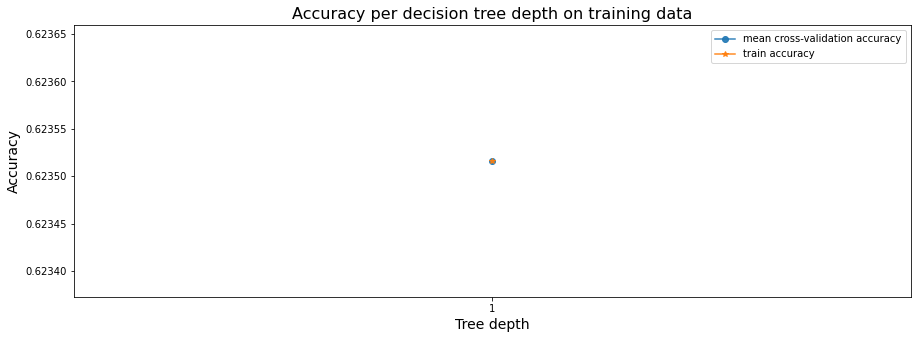

In [264]:
# Cross Validation
# Fitting trees of depth 1
sm_tree_depths = range(1, 2)
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_trees(X9_train, y9_train, 
                                                                                        sm_tree_depths)
# Plotting accuracy
plot_cross_validation_on_trees(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores, 
                               'Accuracy per decision tree depth on training data')

idx_max = sm_cv_scores_mean.argmax()
sm_best_tree_depth = sm_tree_depths[idx_max]
sm_best_tree_cv_score = sm_cv_scores_mean[idx_max]
sm_best_tree_cv_score_std = sm_cv_scores_std[idx_max]
print('The depth-{} tree achieves the best mean cross-validation accuracy {} +/- {}% on training dataset'.format(
      sm_best_tree_depth, round(sm_best_tree_cv_score*100,5), round(sm_best_tree_cv_score_std*100, 5)))

In [351]:
# Dummy Classifier
# Create DummyClassifier class
dummy_clf = DummyClassifier(strategy="stratified", random_state=0)

# Train the model on the data
dummy_clf.fit(X9, y9)

# Train a dummy classifier to make predictions based on the class values
print('Prediction Values:', dummy_clf.predict(X9))

# Measuring model performance
print('Score:', dummy_clf.score(X9, y9))

Prediction Values: ['A' 'B' 'A' ... 'A' 'B' 'A']
Score: 0.47521188900499245


In [352]:
# Cross Validation
# Gather the mean and standard deviation of the accuracy
cv_scores = cross_val_score(dummy_clf, X9, y9, cv=5, scoring='accuracy')
sm_best_tree_cv_score = cv_scores.mean()
sm_best_tree_cv_score_std = cv_scores.std()
print('The best mean cross-validation accuracy {} +/- {}% on training dataset'.format(
      round(sm_best_tree_cv_score*100,5), round(sm_best_tree_cv_score_std*100, 5)))

The best mean cross-validation accuracy 47.81723 +/- 0.47223% on training dataset


In [354]:
# 5x2cv Paired t Test
t, p = paired_ttest_5x2cv(estimator1=dt9, estimator2=dummy_clf, X=X9, y=y9, random_seed=1)

print('t statistic: %.3f' % t)
print('p value: %.9f' % p)

t statistic: 37.094
p value: 0.000000268


### Method 10: Watershed Factor Only, Max Depth = 1
**ACCURACY**: 62.35161 +/- 0.00652%

In [265]:
# Create x and y Dataframes
X10 = wdf_df[['WATERSHD']]
y10 = wdf_df['FIRE_SIZE_CLASS']

In [266]:
# Create train and test sets
# random_state as 42 is an arbitrary value
X10_train, X10_test, y10_train, y10_test = train_test_split(X10, y10, test_size=0.33, random_state=42)

In [267]:
# Create DecisionTreeClassifer class
dt10 = DecisionTreeClassifier(random_state=0)

In [268]:
# Train the model on the data
dt10.fit(X10_train, y10_train)

DecisionTreeClassifier(random_state=0)

In [269]:
# Measuring model performance
dt10.score(X10_test, y10_test)

0.627792436235708

In [270]:
# Max depth of model
print(dt10.tree_.max_depth)

1


In [271]:
# Tuning the depth of a tree
# List of values to try for max_depth:
max_depth_range10 = list(range(1, 3))

# List to store the average RMSE for each value of max_depth:
accuracy10 = []
for depth in max_depth_range10:
    clf = DecisionTreeClassifier(max_depth = depth, random_state = 0)
    clf.fit(X10_train, y10_train)
    score = clf.score(X10_test, y10_test)
    accuracy10.append(score)

# Check the max_depth with the highest accuracy
[[max_depth_range10[i], accuracy10[i]] for i in range(2)]

[[1, 0.627792436235708], [2, 0.627792436235708]]

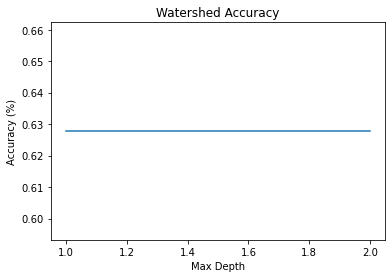

In [272]:
# Plot accuracy
# Check accuracy to see where the highest point is at
plt.plot(max_depth_range10, accuracy10)
plt.title('Watershed Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy (%)')
plt.show()

The depth-1 tree achieves the best mean cross-validation accuracy 62.35161 +/- 0.00652% on training dataset


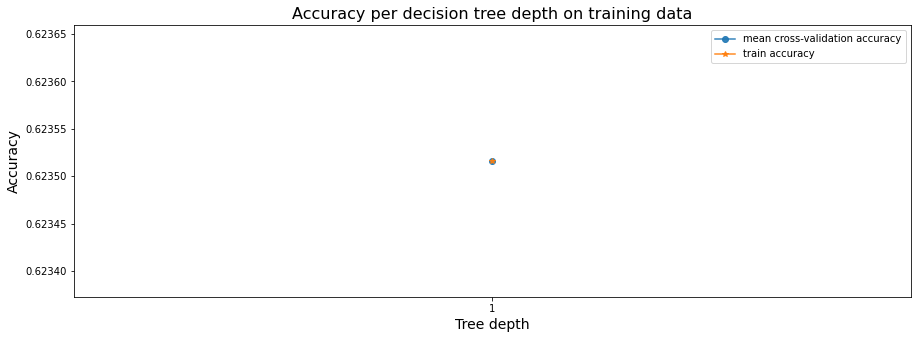

In [273]:
# Cross Validation
# Fitting trees of depth 1
sm_tree_depths = range(1, 2)
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_trees(X10_train, y10_train, 
                                                                                        sm_tree_depths)
# Plotting accuracy
plot_cross_validation_on_trees(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores, 
                               'Accuracy per decision tree depth on training data')

idx_max = sm_cv_scores_mean.argmax()
sm_best_tree_depth = sm_tree_depths[idx_max]
sm_best_tree_cv_score = sm_cv_scores_mean[idx_max]
sm_best_tree_cv_score_std = sm_cv_scores_std[idx_max]
print('The depth-{} tree achieves the best mean cross-validation accuracy {} +/- {}% on training dataset'.format(
      sm_best_tree_depth, round(sm_best_tree_cv_score*100,5), round(sm_best_tree_cv_score_std*100, 5)))

In [355]:
# Dummy Classifier
# Create DummyClassifier class
dummy_clf = DummyClassifier(strategy="stratified", random_state=0)

# Train the model on the data
dummy_clf.fit(X10, y10)

# Train a dummy classifier to make predictions based on the class values
print('Prediction Values:', dummy_clf.predict(X10))

# Measuring model performance
print('Score:', dummy_clf.score(X10, y10))

Prediction Values: ['A' 'B' 'A' ... 'A' 'B' 'A']
Score: 0.47521188900499245


In [356]:
# Cross Validation
# Gather the mean and standard deviation of the accuracy
cv_scores = cross_val_score(dummy_clf, X10, y10, cv=5, scoring='accuracy')
sm_best_tree_cv_score = cv_scores.mean()
sm_best_tree_cv_score_std = cv_scores.std()
print('The best mean cross-validation accuracy {} +/- {}% on training dataset'.format(
      round(sm_best_tree_cv_score*100,5), round(sm_best_tree_cv_score_std*100, 5)))

The best mean cross-validation accuracy 47.81723 +/- 0.47223% on training dataset


In [357]:
# 5x2cv Paired t Test
t, p = paired_ttest_5x2cv(estimator1=dt10, estimator2=dummy_clf, X=X10, y=y10, random_seed=1)

print('t statistic: %.3f' % t)
print('p value: %.9f' % p)

t statistic: 37.094
p value: 0.000000268


### Method 11: Population By County & AWND Factors Only, Max Depth = 7
**ACCURACY**: 62.71547 +/- 0.67351%

In [406]:
# Create x and y Dataframes
X11 = wdf_df[['POP_BY_COUNTY', 'AWND']]
y11 = wdf_df['FIRE_SIZE_CLASS']

In [407]:
# Create train and test sets
# random_state as 42 is an arbitrary value
X11_train, X11_test, y11_train, y11_test = train_test_split(X11, y11, test_size=0.33, random_state=42)

In [408]:
# Create DecisionTreeClassifer class
dt11 = DecisionTreeClassifier(random_state=0)

In [409]:
# Train the model on the data
dt11.fit(X11_train, y11_train)

DecisionTreeClassifier(random_state=0)

In [410]:
# Measuring model performance
dt11.score(X11_test, y11_test)

0.5637642919964819

In [411]:
# Max depth of model
print(dt11.tree_.max_depth)

32


In [412]:
# Tuning the depth of a tree
# List of values to try for max_depth:
max_depth_range11 = list(range(1, 33))

# List to store the average RMSE for each value of max_depth:
accuracy11 = []
for depth in max_depth_range11:
    clf = DecisionTreeClassifier(max_depth = depth, random_state = 0)
    clf.fit(X11_train, y11_train)
    score = clf.score(X11_test, y11_test)
    accuracy11.append(score)

# Check the max_depth with the highest accuracy
[[max_depth_range11[i], accuracy11[i]] for i in range(32)]

[[1, 0.627792436235708],
 [2, 0.627792436235708],
 [3, 0.6279683377308707],
 [4, 0.6286719437115216],
 [5, 0.6348284960422164],
 [6, 0.6381706244503078],
 [7, 0.6383465259454706],
 [8, 0.6358839050131926],
 [9, 0.6344766930518909],
 [10, 0.6258575197889182],
 [11, 0.6233948988566402],
 [12, 0.6184696569920844],
 [13, 0.6102022867194371],
 [14, 0.6059806508355321],
 [15, 0.6022867194371152],
 [16, 0.6019349164467898],
 [17, 0.5906772207563764],
 [18, 0.5832893579595426],
 [19, 0.5790677220756376],
 [20, 0.5713280562884785],
 [21, 0.569744942832014],
 [22, 0.5683377308707124],
 [23, 0.5648197009674583],
 [24, 0.5651715039577836],
 [25, 0.5646437994722955],
 [26, 0.5664028144239226],
 [27, 0.5648197009674583],
 [28, 0.5646437994722955],
 [29, 0.5639401934916447],
 [30, 0.5644678979771328],
 [31, 0.5648197009674583],
 [32, 0.5637642919964819]]

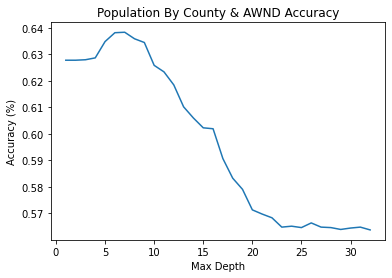

In [413]:
# Plot accuracy
# Check accuracy to see where the highest point is at
plt.plot(max_depth_range11, accuracy11)
plt.title('Population By County & AWND Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy (%)')
plt.show()

The depth-6 tree achieves the best mean cross-validation accuracy 62.70681 +/- 0.86953% on training dataset


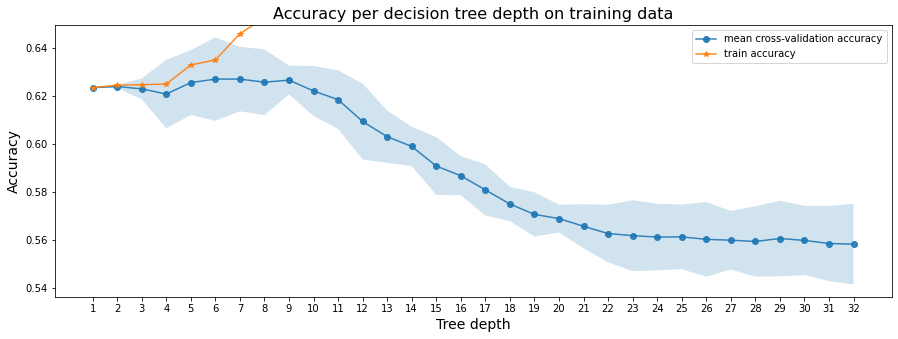

In [392]:
# Cross Validation
# Fitting trees of depth 1
sm_tree_depths = range(1, 33)
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_trees(X11_train, y11_train, 
                                                                                        sm_tree_depths)
# Plotting accuracy
plot_cross_validation_on_trees(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores, 
                               'Accuracy per decision tree depth on training data')

idx_max = sm_cv_scores_mean.argmax()
sm_best_tree_depth = sm_tree_depths[idx_max]
sm_best_tree_cv_score = sm_cv_scores_mean[idx_max]
sm_best_tree_cv_score_std = sm_cv_scores_std[idx_max]
print('The depth-{} tree achieves the best mean cross-validation accuracy {} +/- {}% on training dataset'.format(
      sm_best_tree_depth, round(sm_best_tree_cv_score*100,5), round(sm_best_tree_cv_score_std*100, 5)))

In [393]:
# Dummy Classifier
# Create DummyClassifier class
dummy_clf = DummyClassifier(strategy="stratified", random_state=0)

# Train the model on the data
dummy_clf.fit(X11, y11)

# Train a dummy classifier to make predictions based on the class values
print('Prediction Values:', dummy_clf.predict(X11))

# Measuring model performance
print('Score:', dummy_clf.score(X11, y11))

Prediction Values: ['A' 'B' 'A' ... 'A' 'B' 'A']
Score: 0.47521188900499245


In [394]:
# Cross Validation
# Gather the mean and standard deviation of the accuracy
cv_scores = cross_val_score(dummy_clf, X11, y11, cv=5, scoring='accuracy')
sm_best_tree_cv_score = cv_scores.mean()
sm_best_tree_cv_score_std = cv_scores.std()
print('The best mean cross-validation accuracy {} +/- {}% on training dataset'.format(
      round(sm_best_tree_cv_score*100,5), round(sm_best_tree_cv_score_std*100, 5)))

The best mean cross-validation accuracy 47.81723 +/- 0.47223% on training dataset


In [395]:
# 5x2cv Paired t Test
t, p = paired_ttest_5x2cv(estimator1=dt11, estimator2=dummy_clf, X=X11, y=y11, random_seed=1)

print('t statistic: %.3f' % t)
print('p value: %.7f' % p)

t statistic: 15.897
p value: 0.0000179


### Method 12: Population By County, AWND, & TAVG Factors Only, Max Depth = 5
**ACCURACY**: 62.47292 +/- 0.39571%

In [396]:
# Create x and y Dataframes
X12 = wdf_df[['POP_BY_COUNTY', 'AWND', 'TAVG']]
y12 = wdf_df['FIRE_SIZE_CLASS']

In [397]:
# Create train and test sets
# random_state as 42 is an arbitrary value
X12_train, X12_test, y12_train, y12_test = train_test_split(X12, y12, test_size=0.33, random_state=42)

In [398]:
# Create DecisionTreeClassifer class
dt12 = DecisionTreeClassifier(random_state=0)

In [399]:
# Train the model on the data
dt12.fit(X12_train, y12_train)

DecisionTreeClassifier(random_state=0)

In [400]:
# Measuring model performance
dt12.score(X12_test, y12_test)

0.5526824978012314

In [401]:
# Max depth of model
print(dt12.tree_.max_depth)

36


In [403]:
# Tuning the depth of a tree
# List of values to try for max_depth:
max_depth_range12 = list(range(1, 37))

# List to store the average RMSE for each value of max_depth:
accuracy12 = []
for depth in max_depth_range12:
    clf = DecisionTreeClassifier(max_depth = depth, random_state = 0)
    clf.fit(X12_train, y12_train)
    score = clf.score(X12_test, y12_test)
    accuracy12.append(score)

# Check the max_depth with the highest accuracy
[[max_depth_range12[i], accuracy12[i]] for i in range(36)]

[[1, 0.627792436235708],
 [2, 0.627792436235708],
 [3, 0.627792436235708],
 [4, 0.6284960422163588],
 [5, 0.6233948988566402],
 [6, 0.6311345646437995],
 [7, 0.627792436235708],
 [8, 0.6295514511873351],
 [9, 0.6274406332453826],
 [10, 0.6153034300791557],
 [11, 0.6068601583113457],
 [12, 0.6068601583113457],
 [13, 0.605452946350044],
 [14, 0.5994722955145119],
 [15, 0.5901495162708883],
 [16, 0.5887423043095866],
 [17, 0.5866314863676341],
 [18, 0.580123131046614],
 [19, 0.5711521547933157],
 [20, 0.5706244503078276],
 [21, 0.5635883905013193],
 [22, 0.5581354441512753],
 [23, 0.5567282321899736],
 [24, 0.5579595426561126],
 [25, 0.5551451187335092],
 [26, 0.5542656112576957],
 [27, 0.5546174142480211],
 [28, 0.5554969217238347],
 [29, 0.5554969217238347],
 [30, 0.5514511873350924],
 [31, 0.5549692172383466],
 [32, 0.5539138082673702],
 [33, 0.5533861037818821],
 [34, 0.5542656112576957],
 [35, 0.5537379067722076],
 [36, 0.5533861037818821]]

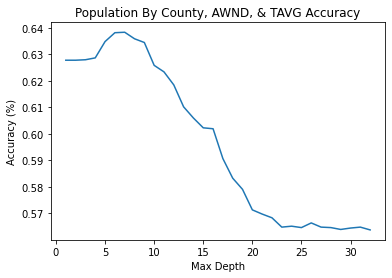

In [414]:
# Plot accuracy
# Check accuracy to see where the highest point is at
plt.plot(max_depth_range11, accuracy11)
plt.title('Population By County, AWND, & TAVG Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy (%)')
plt.show()

The depth-5 tree achieves the best mean cross-validation accuracy 62.47292 +/- 0.39571% on training dataset


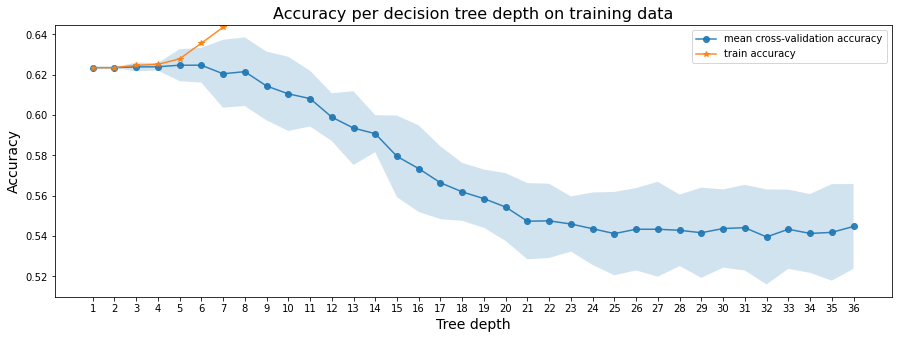

In [415]:
# Cross Validation
# Fitting trees of depth 1
sm_tree_depths = range(1, 37)
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_trees(X12_train, y12_train, 
                                                                                        sm_tree_depths)
# Plotting accuracy
plot_cross_validation_on_trees(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores, 
                               'Accuracy per decision tree depth on training data')

idx_max = sm_cv_scores_mean.argmax()
sm_best_tree_depth = sm_tree_depths[idx_max]
sm_best_tree_cv_score = sm_cv_scores_mean[idx_max]
sm_best_tree_cv_score_std = sm_cv_scores_std[idx_max]
print('The depth-{} tree achieves the best mean cross-validation accuracy {} +/- {}% on training dataset'.format(
      sm_best_tree_depth, round(sm_best_tree_cv_score*100,5), round(sm_best_tree_cv_score_std*100, 5)))

In [416]:
# Dummy Classifier
# Create DummyClassifier class
dummy_clf = DummyClassifier(strategy="stratified", random_state=0)

# Train the model on the data
dummy_clf.fit(X12, y12)

# Train a dummy classifier to make predictions based on the class values
print('Prediction Values:', dummy_clf.predict(X12))

# Measuring model performance
print('Score:', dummy_clf.score(X12, y12))

Prediction Values: ['A' 'B' 'A' ... 'A' 'B' 'A']
Score: 0.47521188900499245


In [417]:
# Cross Validation
# Gather the mean and standard deviation of the accuracy
cv_scores = cross_val_score(dummy_clf, X12, y12, cv=5, scoring='accuracy')
sm_best_tree_cv_score = cv_scores.mean()
sm_best_tree_cv_score_std = cv_scores.std()
print('The best mean cross-validation accuracy {} +/- {}% on training dataset'.format(
      round(sm_best_tree_cv_score*100,5), round(sm_best_tree_cv_score_std*100, 5)))

The best mean cross-validation accuracy 47.81723 +/- 0.47223% on training dataset


In [419]:
# 5x2cv Paired t Test
t, p = paired_ttest_5x2cv(estimator1=dt12, estimator2=dummy_clf, X=X12, y=y12, random_seed=1)

print('t statistic: %.3f' % t)
print('p value: %.5f' % p)

t statistic: 6.850
p value: 0.00101
